<a href="https://colab.research.google.com/github/Lalasa-24/Suicidal_Ideation/blob/main/Suicidal_Ideation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import metrics
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

In [2]:
import pandas as pd
df = pd.read_csv('/content/Suicide_Ideation_Dataset(Twitter-based).csv')

In [3]:
df.head()

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post


In [4]:
df.shape

(1790, 2)

In [5]:
df.groupby('Suicide').describe()
# Convert float values in 'Tweet' column to strings

df['Tweet'] = df['Tweet'].astype(str)

# Calculate the length of each tweet
df['length'] = df['Tweet'].apply(len)

df.head(10)
# df['length'].plot(bins=50,kind = 'hist')

,Tweet,Suicide,length
0,making some lunch,Not Suicide post,17
1,@Alexia You want his money.,Not Suicide post,27
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post,86
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post,66
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post,143
5,"@ValenValdez Oh, that's good to hear. But is i...",Not Suicide post,104
6,@mcm180 u've got a list for fellow #hotties? Y...,Not Suicide post,84
7,@jakepaul @jamescharles @LoganPaul Just becaus...,Potential Suicide post,142
8,time for some warsaw beer garden chilling,Not Suicide post,41
9,I hate my life lmao I hope I die soon or sumn ...,Potential Suicide post,73


In [6]:
df.groupby('Suicide').describe()

length                                            \
                          count        mean         std  min   25%    50%   
Suicide                                                                     
Not Suicide post         1128.0   74.963652   38.359014  3.0  43.0   71.0   
Potential Suicide post    662.0  156.394260  158.887462  3.0  72.0  138.0   

                                        
                           75%     max  
Suicide                                 
Not Suicide post         106.0   281.0  
Potential Suicide post   145.0  1232.0

In [11]:
X=df['Tweet']
Y=df['Suicide']

<Axes: xlabel='Suicide'>

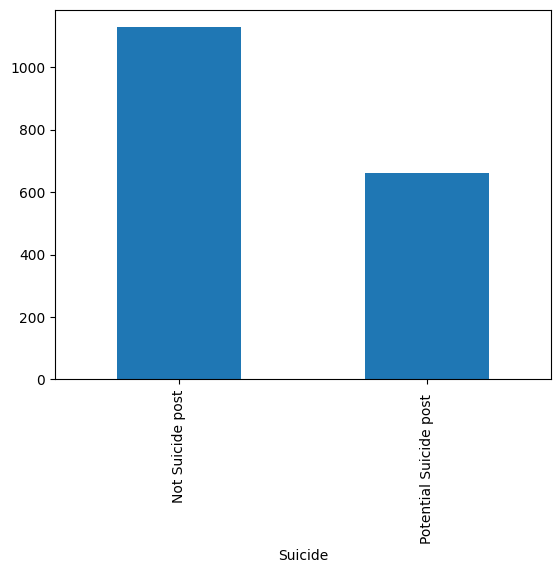

In [12]:
df['Suicide'].value_counts().plot(kind='bar')

In [14]:
count_vect = CountVectorizer()
count_vect.fit(X)

# transform the training and validation data using count vectorizer object
X_title =  count_vect.transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_title, Y, test_size=0.2)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_train.shape)

(1432, 6355)
(1432,)
(358, 6355)
(1432,)


In [17]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

preds = nb.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
print("Multinomial Accuracy : {}".format(nb.score(X_train,y_train)))

[[193  40]
 [  3 122]]


                         precision    recall  f1-score   support

       Not Suicide post       0.98      0.83      0.90       233
Potential Suicide post        0.75      0.98      0.85       125

               accuracy                           0.88       358
              macro avg       0.87      0.90      0.87       358
           weighted avg       0.90      0.88      0.88       358

Multinomial Accuracy : 0.9608938547486033


In [18]:
from sklearn import svm
from sklearn.svm import SVC
model = svm.SVC(kernel = 'linear', C = 1, gamma = 1)
model.fit(X_train, y_train)
print("svc test data accuracy score is: {}".format(model.score(X_test, y_test)))

svc test data accuracy score is: 0.946927374301676


In [19]:
test=["I want to die"]
test=count_vect.transform(test)
model.predict(test)

array(['Potential Suicide post '], dtype=object)

In [20]:
test2=["I love this song"]
test2=count_vect.transform(test2)
model.predict(test2)

array(['Not Suicide post'], dtype=object)

In [21]:
import joblib

In [22]:
from sklearn.ensemble import RandomForestClassifier
import joblib

clf = RandomForestClassifier()
clf.fit(X_train, y_train)  # assuming X_train and y_train are your training data

joblib.dump(clf, 'model.joblib')

['model.joblib']